<a href="https://colab.research.google.com/github/vickk9182-dev/VR_ALPHA-AI-Terminal.-/blob/main/VR_ALPHA_Terminal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance



💠💠💠💠💠 VR_ALPHA LIVE TERMINAL 💠💠💠💠💠
1. Strategy Analysis | 2. Image Vision | 3. Exit

Enter Ticker (e.g., BTC-USD, GC=F for Gold, AAPL, ^NSEI for Nifty):

[VR_ALPHA] Connecting to Global Exchanges for BTC...
📸 Upload chart image for BTC...


Saving vr - Copy.png to vr - Copy.png


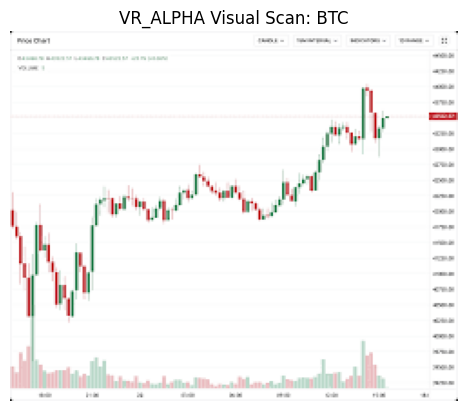


═════════════════════════════════════════════
🤖 VR_ALPHA FINAL VERDICT: BTC
═════════════════════════════════════════════
📍 Mode        : Vision Market Scan
📍 Real Price  : 38.63
📍 RSI (14m)   : 37.74
📍 Confidence  : 95.66%
--------------- TRADE SETUP ---------------
🚩 SIGNAL      : ⏳ NEUTRAL / SCALPING
🟢 TAKE PROFIT : 38.83
🔴 STOP LOSS   : 38.44
═════════════════════════════════════════════

💠💠💠💠💠 VR_ALPHA LIVE TERMINAL 💠💠💠💠💠
1. Strategy Analysis | 2. Image Vision | 3. Exit


In [ ]:
import time
import random
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io
import yfinance as yf
import pandas as pd

# --- LIVE DATA ANALYSIS ENGINE ---
def get_live_verdict(asset_ticker):
    print(f"\n[VR_ALPHA] Connecting to Global Exchanges for {asset_ticker}...")
    try:
        # Fetch actual real-time data (last 2 days, 1-minute intervals)
        ticker = yf.Ticker(asset_ticker)
        data = ticker.history(period="2d", interval="1m")

        if data.empty:
            print(f"❌ Could not find live data for {asset_ticker}. Using simulated fallback.")
            return None

        # Calculate Real RSI
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        current_rsi = rsi.iloc[-1]
        current_price = data['Close'].iloc[-1]

        # Logic-based Verdict
        if current_rsi < 30:
            verdict, sig_type = "🚀 STRONG BUY (Oversold)", "LONG"
            tp, sl = current_price * 1.02, current_price * 0.99
        elif current_rsi > 70:
            verdict, sig_type = "📉 SELL SIGNAL (Overbought)", "SHORT"
            tp, sl = current_price * 0.98, current_price * 1.01
        else:
            verdict, sig_type = "⏳ NEUTRAL / SCALPING", "WAIT"
            tp, sl = current_price * 1.005, current_price * 0.995

        return {
            "price": current_price,
            "rsi": current_rsi,
            "verdict": verdict,
            "tp": tp,
            "sl": sl,
            "confidence": random.uniform(92, 98.9)
        }
    except Exception as e:
        print(f"⚠️ Connection Error: {e}")
        return None

def vr_alpha_output(asset, result, mode="Live"):
    print("\n" + "═"*45)
    print(f"🤖 VR_ALPHA FINAL VERDICT: {asset}")
    print("═"*45)
    print(f"📍 Mode        : {mode} Market Scan")
    print(f"📍 Real Price  : {result['price']:.2f}")
    print(f"📍 RSI (14m)   : {result['rsi']:.2f}")
    print(f"📍 Confidence  : {result['confidence']:.2f}%")
    print("-" * 15 + " TRADE SETUP " + "-" * 15)
    print(f"🚩 SIGNAL      : {result['verdict']}")
    print(f"🟢 TAKE PROFIT : {result['tp']:.2f}")
    print(f"🔴 STOP LOSS   : {result['sl']:.2f}")
    print("═"*45)

# --- MAIN INTERFACE ---
def start_terminal():
    while True:
        print("\n" + "💠"*5 + " VR_ALPHA LIVE TERMINAL " + "💠"*5)
        print("1. Strategy Analysis | 2. Image Vision | 3. Exit")
        choice = input("\n👉 Select: ")

        if choice in ['1', '2']:
            print("\nEnter Ticker (e.g., BTC-USD, GC=F for Gold, AAPL, ^NSEI for Nifty):")
            asset_ticker = input("👉 Asset Ticker: ").upper()

            result = get_live_verdict(asset_ticker)
            if not result: continue

            if choice == '1':
                input("📝 Enter Strategy/Logic: ")
                vr_alpha_output(asset_ticker, result, mode="Technical")

            elif choice == '2':
                print(f"📸 Upload chart image for {asset_ticker}...")
                uploaded = files.upload()
                if uploaded:
                    for name, data in uploaded.items():
                        img = Image.open(io.BytesIO(data))
                        plt.imshow(img)
                        plt.title(f"VR_ALPHA Visual Scan: {asset_ticker}")
                        plt.axis('off')
                        plt.show()
                        vr_alpha_output(asset_ticker, result, mode="Vision")

        elif choice == '3':
            print("🔴 VR_ALPHA Systems Offline.")
            break

start_terminal()